In [3]:
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from datetime import datetime
from pytz import timezone
from bs4 import BeautifulSoup

page1 = requests.get('https://scoresaber.com/global/1&country=kr')
page2 = requests.get('https://scoresaber.com/global/2&country=kr')
soup1 = BeautifulSoup(page1.content, 'html.parser')
soup2 = BeautifulSoup(page2.content, 'html.parser')

nick1 = soup1.select('.songTop')
scor1 = soup1.select('.ppValue')
nick2 = soup2.select('.songTop')
scor2 = soup2.select('.ppValue')

curtime = datetime.now().astimezone(timezone('Asia/Seoul'))

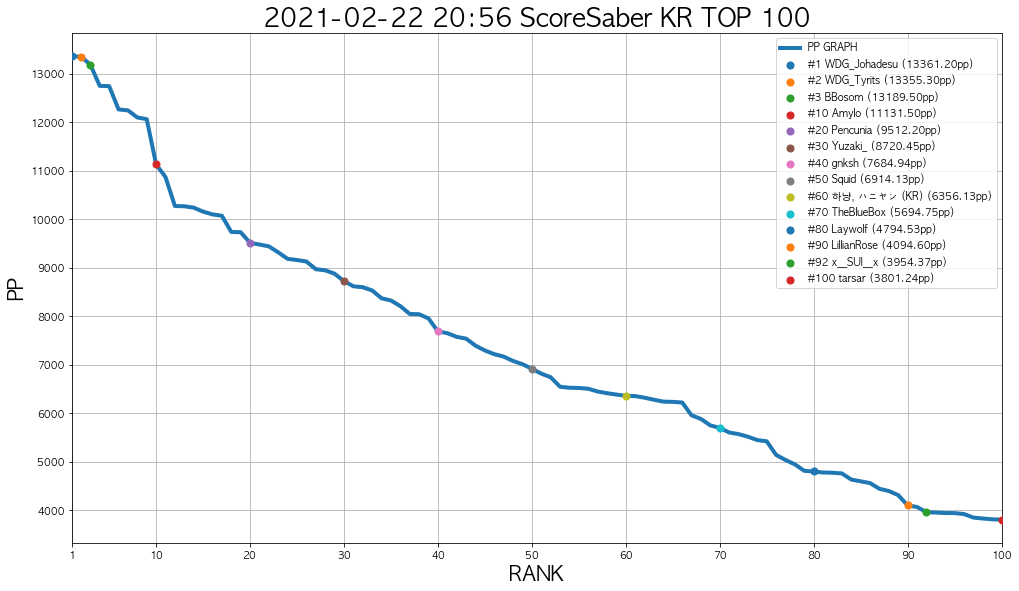

In [4]:
nicks = list()
scores = list()
for i in range(0, 50):
    nicks.append(nick1[i].get_text())
    scores.append(float(scor1[i].get_text().replace(',', '')))
for i in range(0, 50):
    nicks.append(nick2[i].get_text())
    scores.append(float(scor2[i].get_text().replace(',', '')))
data = {'nickname': nicks, 'scores': scores}
rankpd = pd.DataFrame(data, index = range(1, 101))

suirank = 0
cnt = 0
for n in nicks:
    cnt += 1
    if n == 'x__SUI__x':
        suirank = cnt
        break

font_path = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.grid'] = True

#GRAPH
fig, ax = plt.subplots()
x = 1200 / fig.dpi
y = 675 / fig.dpi
fig.set_figwidth(x)
fig.set_figheight(y)

plt.plot(rankpd.index, rankpd.scores)
plt.title('%4d-%02d-%02d %02d:%02d ScoreSaber KR TOP 100' %
          (curtime.year,curtime.month,curtime.day,curtime.hour,curtime.minute), fontsize=25)
plt.xlabel('RANK', fontsize=20)
plt.ylabel('PP', fontsize=20)
plt.xlim([1, 100])
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.yticks(range(3000, 14000, 1000))

showscore = [1, 2, 3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
if suirank not in showscore:
    showscore.append(suirank)
showscore.sort()
for ssc in showscore:
    plt.scatter(ssc, scores[ssc-1], zorder=ssc+100, s=50)

leglab = ['PP GRAPH']
for ss in showscore:
    leglab.append('#%d %s (%.2fpp)'%(ss, nicks[ss-1], scores[ss-1]))
plt.legend(labels=leglab, loc='upper right')

plt.savefig('./sskr%4d%02d%02d%02d%02d.png'
            %(curtime.year,curtime.month,curtime.day,curtime.hour,curtime.minute), transparent=False)
#plt.show()